## This notebook provides a simple example of FIF using on a to functional dataset.

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fif as FIF
import matplotlib

### Simulated functions

In [2]:
np.random.seed(42)
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]
Z1 = np.zeros((m))
for j in range(m):
    if (tps[j]<0.2 or tps[j]>0.8):
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2
    else:
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Z1[0] = 0
Z1[m-1] = 0


Z2 = 30 * ((1-tps) ** 1.6) * tps ** 1.6
Z3 = np.zeros((m))
for j in range(m):
    Z3[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.sin(2*np.pi*tps[j])

Z4 = np.zeros((m))
for j in range(m):
    Z4[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2

for j in range(70,71):
    Z4[j] += 2

Z5 = np.zeros((m))
for j in range(m):
    Z5[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + 0.5*np.sin(10*np.pi*tps[j])

X = np.concatenate((X,Z1.reshape(1,-1),Z2.reshape(1,-1),
                     Z3.reshape(1,-1), Z4.reshape(1,-1), Z5.reshape(1,-1)), axis = 0)

### Compute Functional Isolation Forest:

In [3]:
time = np.linspace(0,1,X.shape[1])
F = FIF.FiForest(X, time,  sample_size=64, alpha=0.5, dic_number=1)
# dic_number set the dictionary where data are projected.three dictionaries are available:
# 0 corresponds to Brownian motion, 1 to gaussian wavelets and 2 to cosine dictionary.
S1 = F.compute_paths()

### Display results:

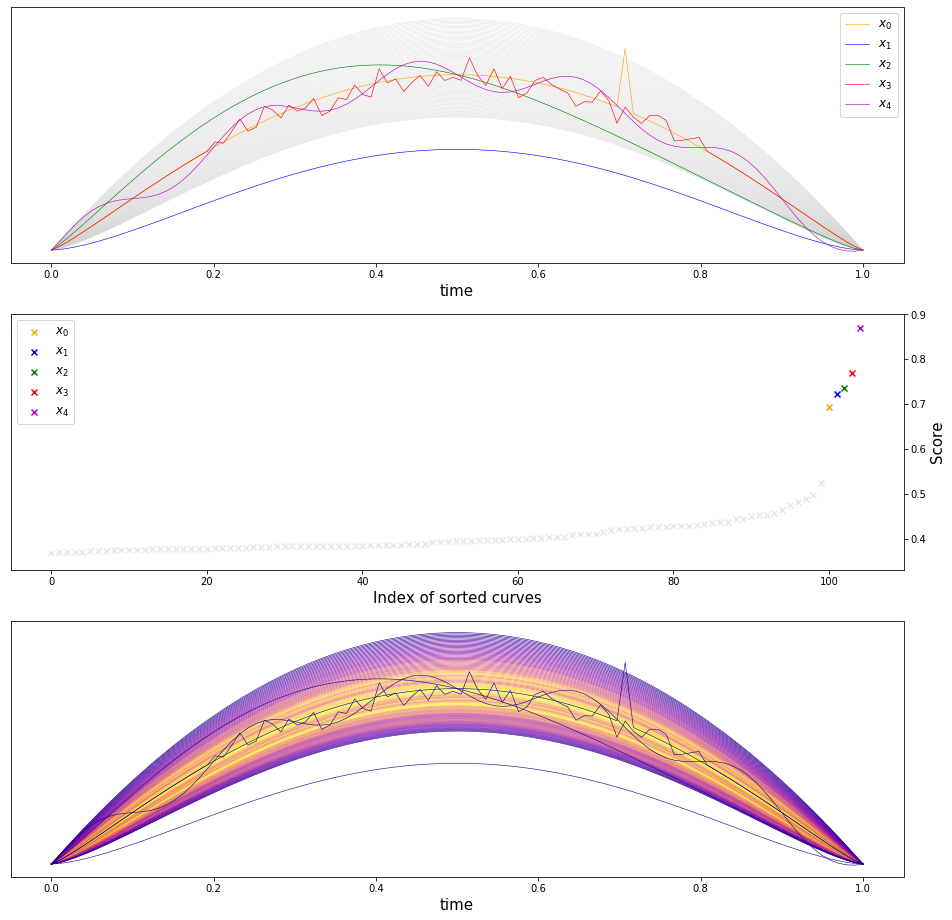

In [4]:
fig= plt.figure(figsize=(16,16))
ax = fig.add_subplot(311)
for i in range(100):
    ax.plot(tps, X[i], c='Lightgray', linewidth=0.3)
    
ax.plot(tps,Z4,c='orange', label='$x_0$', linewidth=0.6)
ax.plot(tps,Z2,c='b', label='$x_1$', linewidth=0.6)
ax.plot(tps,Z3,c='g', label='$x_2$', linewidth=0.6)
ax.plot(tps,Z1,c='r', label='$x_3$', linewidth=0.6)
ax.plot(tps,Z5,c='m', label='$x_4$', linewidth=0.6)
ax.set_xlabel('time',size=15)
plt.yticks([]) 
ax.legend(fontsize='large')
ax = fig.add_subplot(312)
for i in range(len(S1)-5):
    ax.scatter(np.arange(len(S1))[i],np.sort(S1)[i], color='Lightgray', marker='x',alpha=0.5)

ax.scatter(100, np.sort(S1)[100], color='orange', marker='x', label='$x_0$')
ax.scatter(101, np.sort(S1)[101], c='b', marker='x', label='$x_1$')
ax.scatter(102, np.sort(S1)[102], c='g', marker='x',  label='$x_2$')
ax.scatter(103, np.sort(S1)[103], c='r', marker='x', label='$x_3$')
ax.scatter(104, np.sort(S1)[104], c='m', marker='x', label='$x_4$')

ax.set_xlabel('Index of sorted curves',size=15)
ax.yaxis.tick_right()

ax.yaxis.set_label_position("right")
ax.set_ylabel('Score',size=15)
ax.legend(fontsize='large')

ax = fig.add_subplot(313)

colors = [ matplotlib.cm.plasma_r(x)
            for x in np.linspace(0, 1, len(S1)) ]
for j in range(0,len(colors)):
    ax.plot(tps, X[np.argsort(S1)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)

ax.set_xlabel('time',size=15)
  
    

plt.yticks([]) 
plt.show()